In [98]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

from scipy import ndimage
from skimage import measure, color, io

#from skimage.segmentaion import clear_border


In [99]:
#img_n = img_n.astype(np.uint8)
img = cv2.imread('img_test_all_channels.tif')
img_n = img[:,:,0]
#img_n = cv2.cvtColor(img_n, cv2.COLOR_BGR2GRAY)
img_n_filt = (img_n>90).astype(int)

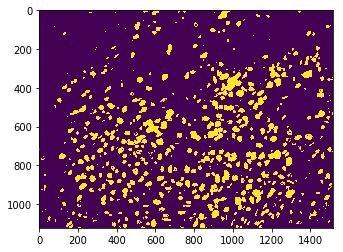

In [100]:
plt.imshow(img_n_filt)

In [101]:

ret1, thresh = cv2.threshold(img_n, 0,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [102]:
kernal = np.ones((2,2),np.uint8)
opening = cv2.morphologyEx(img_n,cv2.MORPH_OPEN,kernal,iterations=2)

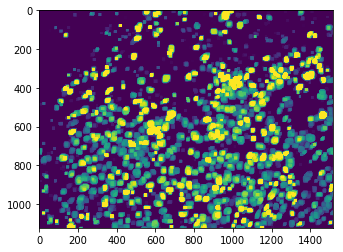

In [122]:
sure_bg = cv2.dilate(opening,kernal,iterations = 10)
plt.imshow(sure_bg)

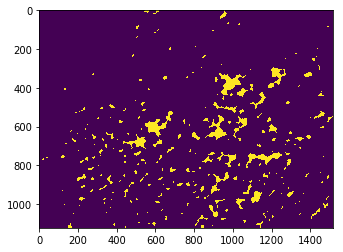

In [138]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,3)
ret2, sure_fg = cv2.threshold(dist_transform,.3*dist_transform.max(),255,0)



# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

plt.imshow(sure_fg)

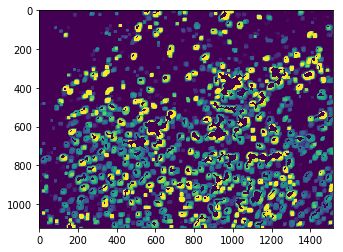

In [139]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0
plt.imshow(unknown)

In [140]:
markers = cv2.watershed(img,markers)


In [141]:
numpy.shape(markers)

(1124, 1517)

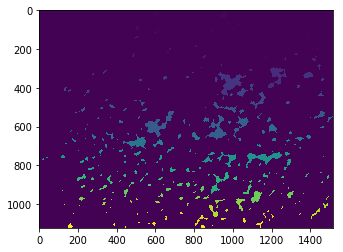

In [142]:
plt.imshow(markers)

In [29]:
markers

array([[10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       ...,
       [23, 23, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10]], dtype=int32)